#데이터 전처리


## 기본

In [3]:
import pandas as pd

- dict를 이용한 데이터 프레임 생성

In [4]:
dummy = {'a' : [1,2,3], 'b':[4,5,6], 'c':[7,8,9]}
df = pd.DataFrame(dummy)
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


- list를 이용한 데이터프레임 생성

In [5]:
dummy = [[1,2,3],[4,5,6],[7,8,9]]
df = pd.DataFrame(dummy)
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [6]:
df.columns = ['a','b','c']
df

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [7]:
'''
a = {'company': ['abc', '회사', 123], '직원수':[400,10,6], '위치':['seoul', , 'Busan']}
df = pd.DataFrame(a)
df
'''

"\na = {'company': ['abc', '회사', 123], '직원수':[400,10,6], '위치':['seoul', , 'Busan']}\ndf = pd.DataFrame(a)\ndf\n"

In [8]:
import numpy as np
a = {'company': ['abc', '회사', 123], '직원수':[400,10,6], '위치':['seoul', np.NaN, 'Busan']}
df = pd.DataFrame(a)
df

,company,직원수,위치
0,abc,400,seoul
1,회사,10,NaN
2,123,6,Busan


- 칼럼명 추출/ 변경

In [9]:
df = pd.DataFrame({'a' : [1,2,3], 'b':[4,5,6], 'c':[7,8,9]})
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [10]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

In [11]:
df.columns[1]

'b'

In [12]:
df.columns = ['d','e','f']
df

,d,e,f
0,1,4,7
1,2,5,8
2,3,6,9


In [13]:
df.rename(columns = {'d':'디', 'f':'에프'}, inplace = True) # column이 많을때 몇개만 바꾸려면 효과적임 
df

,디,e,에프
0,1,4,7
1,2,5,8
2,3,6,9


##copy 문제


In [14]:
#얕은 복사와 깊은 복사
df2 = df # 얕은 복사

In [15]:
df

,디,e,에프
0,1,4,7
1,2,5,8
2,3,6,9


In [16]:
df2

,디,e,에프
0,1,4,7
1,2,5,8
2,3,6,9


In [17]:
df.columns = ['a','b','c']

In [18]:
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [19]:
df2 # 난 df만 바꿨는데 df2도 바뀜 -> 얕은 복사 -> 하나의 데이터프레임 객체를 df, df2라는 두개의 이름이 가리키고 있었던 것

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [20]:
# 깊은 복사
import copy
df3 = copy.deepcopy(df)
df

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [21]:
df3

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


In [22]:
df.columns = ['d','e','f']

In [23]:
df

,d,e,f
0,1,4,7
1,2,5,8
2,3,6,9


In [24]:
df3

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9


##Series

In [25]:
df

,d,e,f
0,1,4,7
1,2,5,8
2,3,6,9


In [26]:
df['d']

0    1
1    2
2    3
Name: d, dtype: int64

In [27]:
type(df['d'])

pandas.core.series.Series

In [28]:
#시리즈 생성 방법
a = pd.Series([1,2,3,1,2,3])
a

0    1
1    2
2    3
3    1
4    2
5    3
dtype: int64

In [29]:
a = pd.Series([1,2,3,1,2,3], index = ['a','b','c','d','e','f'])
a

a    1
b    2
c    3
d    1
e    2
f    3
dtype: int64

In [30]:
a['e']

2

In [31]:
# 유일한 값 찾기
df = pd.DataFrame({'a':[1,2,3,1,2,3], 'b': [4,5,6,6,7,8], 'c':[7,8,9,10,11,12]})
a = df['a']
print(type(a))
a

<class 'pandas.core.series.Series'>


0    1
1    2
2    3
3    1
4    2
5    3
Name: a, dtype: int64

In [32]:
a.unique()

array([1, 2, 3])

In [33]:
a.unique()[2]

3

In [34]:
'''
df['a','b'] #이런거 안됨 -> loc, iloc 이용
'''

"\ndf['a','b'] #이런거 안됨 -> loc, iloc 이용\n"

##loc iloc 이용 데이터 추출


In [35]:
df = pd.DataFrame({'a':[i for i in range(1,11)], 'b':[i for i in range(11,21)], 'c':[i for i in range(21,31)]})
df

,a,b,c
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24
4,5,15,25
5,6,16,26
6,7,17,27
7,8,18,28
8,9,19,29
9,10,20,30


In [36]:
df[['a','b']]

,a,b
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16
6,7,17
7,8,18
8,9,19
9,10,20


In [37]:
'''
df[0]
'''

'\ndf[0]\n'

In [38]:
df.loc[0]

a     1
b    11
c    21
Name: 0, dtype: int64

In [39]:
#슬라이스도 가능
df.loc[2:4] #리스트랑은 인덱스 형태가 다름

,a,b,c
2,3,13,23
3,4,14,24
4,5,15,25


- 문자로 인덱스

In [40]:
index = ['a','b','d','c','e','f','g','g','h','i']
df = pd.DataFrame({'a':[i for i in range(1,11)], 'b':[i for i in range(11,21)], 'c':[i for i in range(21,31)]}, index = index)
df

,a,b,c
a,1,11,21
b,2,12,22
d,3,13,23
c,4,14,24
e,5,15,25
f,6,16,26
g,7,17,27
g,8,18,28
h,9,19,29
i,10,20,30


In [41]:
df.loc['g']

,a,b,c
g,7,17,27
g,8,18,28


In [42]:
df.loc['c':] # 알파벳 순이 아니라 저장했던 순서

,a,b,c
c,4,14,24
e,5,15,25
f,6,16,26
g,7,17,27
g,8,18,28
h,9,19,29
i,10,20,30


In [43]:
df.loc[['g','i'],['a','c']]

,a,c
g,7,27
g,8,28
i,10,30


In [44]:
df.iloc[:5, [0,2]] # iloc는 리스트랑 같은 인덱스, 설정한 인덱스와 상관없이 숫자로만.

,a,c
a,1,21
b,2,22
d,3,23
c,4,24
e,5,25


In [45]:
df[df['a']>=3]

,a,b,c
d,3,13,23
c,4,14,24
e,5,15,25
f,6,16,26
g,7,17,27
g,8,18,28
h,9,19,29
i,10,20,30


In [46]:
df[df['a']>=3][['a','c']]

,a,c
d,3,23
c,4,24
e,5,25
f,6,26
g,7,27
g,8,28
h,9,29
i,10,30


In [47]:
df[df['a']>=3][['a','c']][['c']]

,c
d,23
c,24
e,25
f,26
g,27
g,28
h,29
i,30


In [48]:
# 조건이 두개일때
df[(df['a']>=3) & (df['b']<16)]

,a,b,c
d,3,13,23
c,4,14,24
e,5,15,25


In [49]:
a = (df['a']>=3) & (df['b']<16)
print(type(a))
a

<class 'pandas.core.series.Series'>


a    False
b    False
d     True
c     True
e     True
f    False
g    False
g    False
h    False
i    False
dtype: bool

In [50]:
df[a]

,a,b,c
d,3,13,23
c,4,14,24
e,5,15,25


In [51]:
a = (df['a']<=3) | (df['a']>=7)
df[a]

,a,b,c
a,1,11,21
b,2,12,22
d,3,13,23
g,7,17,27
g,8,18,28
h,9,19,29
i,10,20,30


##정렬

In [52]:
df = pd.DataFrame({'a':[2,3,2,7,4], 'b':[2,1,3,5,3], 'c':[1,1,2,3,5]})
df

,a,b,c
0,2,2,1
1,3,1,1
2,2,3,2
3,7,5,3
4,4,3,5


In [53]:
df.sort_index() # 인덱스 기준 정렬

,a,b,c
0,2,2,1
1,3,1,1
2,2,3,2
3,7,5,3
4,4,3,5


In [54]:
df.sort_index(ascending = False, inplace = True)
df

,a,b,c
4,4,3,5
3,7,5,3
2,2,3,2
1,3,1,1
0,2,2,1


In [55]:
df.reset_index() # 기존의 인덱스가 저장된다..

,index,a,b,c
0,4,4,3,5
1,3,7,5,3
2,2,2,3,2
3,1,3,1,1
4,0,2,2,1


In [56]:
df.reset_index(inplace = True, drop = True) # 기존의 인덱스가 저장된다..
df

,a,b,c
0,4,3,5
1,7,5,3
2,2,3,2
3,3,1,1
4,2,2,1


In [57]:
df.sort_index(ascending=False, inplace = True)

In [58]:
df.reset_index(drop=True, inplace=True)

In [59]:
df

,a,b,c
0,2,2,1
1,3,1,1
2,2,3,2
3,7,5,3
4,4,3,5


In [60]:
#value기준으로 정렬
df.sort_values(by=['a'], inplace = True, ascending = False)
df

,a,b,c
3,7,5,3
4,4,3,5
1,3,1,1
0,2,2,1
2,2,3,2


In [61]:
df.sort_values(by = ['a','b'])

,a,b,c
0,2,2,1
2,2,3,2
1,3,1,1
4,4,3,5
3,7,5,3


In [62]:
df.sort_values(by = ['a','b'], ascending = [True, False], inplace=True)

In [63]:
df.reset_index(drop=True, inplace = True)
df

,a,b,c
0,2,3,2
1,2,2,1
2,3,1,1
3,4,3,5
4,7,5,3


##결측값 처리

In [64]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'a':[1,1,3,4,5], 'b':[2,3,np.nan,3,4], 'c':[3,4,7,6,4]})
df

,a,b,c
0,1,2.0,3
1,1,3.0,4
2,3,NaN,7
3,4,3.0,6
4,5,4.0,4


In [65]:
df.isnull()

,a,b,c
0,False,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,False,False


In [66]:
df.isnull().sum()

a    0
b    1
c    0
dtype: int64

In [67]:
df.dropna() # 결측값이 포함된 행 지우기

,a,b,c
0,1,2.0,3
1,1,3.0,4
3,4,3.0,6
4,5,4.0,4


In [68]:
df.dropna(axis=1, inplace=False) # 결측값이 포함된 열 지우기

,a,c
0,1,3
1,1,4
2,3,7
3,4,6
4,5,4


In [69]:
df.fillna(0, inplace=False)

,a,b,c
0,1,2.0,3
1,1,3.0,4
2,3,0.0,7
3,4,3.0,6
4,5,4.0,4


In [70]:
# 앞이나 뒤의 숫자로 바꿔주기
df = pd.DataFrame({'a':[1,1,3,4,np.nan], 'b':[2,3,np.nan,np.nan,4], 'c':[np.nan,4,1,1,4]})
df

,a,b,c
0,1.0,2.0,NaN
1,1.0,3.0,4.0
2,3.0,NaN,1.0
3,4.0,NaN,1.0
4,NaN,4.0,4.0


In [71]:
df.fillna(method='bfill') #backward fill 뒤의 값으로 채움

,a,b,c
0,1.0,2.0,4.0
1,1.0,3.0,4.0
2,3.0,4.0,1.0
3,4.0,4.0,1.0
4,NaN,4.0,4.0


In [72]:
df.fillna(method='ffill') #forward fill 뒤의 값으로 채움

,a,b,c
0,1.0,2.0,NaN
1,1.0,3.0,4.0
2,3.0,3.0,1.0
3,4.0,3.0,1.0
4,4.0,4.0,4.0


In [73]:
# limit 설정
df.fillna(method='ffill', limit = 1) # 한번만 내려감

,a,b,c
0,1.0,2.0,NaN
1,1.0,3.0,4.0
2,3.0,3.0,1.0
3,4.0,NaN,1.0
4,4.0,4.0,4.0


In [74]:
# 각 열의 평균으로 채움
df.fillna(df.mean())

,a,b,c
0,1.00,2.0,2.5
1,1.00,3.0,4.0
2,3.00,3.0,1.0
3,4.00,3.0,1.0
4,2.25,4.0,4.0


In [75]:
# a열의 평균으로 채움1
df.fillna(df['a'].mean())

,a,b,c
0,1.00,2.00,2.25
1,1.00,3.00,4.00
2,3.00,2.25,1.00
3,4.00,2.25,1.00
4,2.25,4.00,4.00


In [76]:
# a열의 평균으로 채움2
df.fillna(df.mean()['a'])

,a,b,c
0,1.00,2.00,2.25
1,1.00,3.00,4.00
2,3.00,2.25,1.00
3,4.00,2.25,1.00
4,2.25,4.00,4.00


In [77]:
print(df)
type(df.mean())

     a    b    c
0  1.0  2.0  NaN
1  1.0  3.0  4.0
2  3.0  NaN  1.0
3  4.0  NaN  1.0
4  NaN  4.0  4.0


pandas.core.series.Series

In [78]:
#b,c열 만 각각의 평균으로 결측값 채움
df.fillna(df.mean()[['b','c']])

,a,b,c
0,1.0,2.0,2.5
1,1.0,3.0,4.0
2,3.0,3.0,1.0
3,4.0,3.0,1.0
4,NaN,4.0,4.0


##타입 변환

In [79]:
df = pd.DataFrame({'판매일' : ['5/11/21', '5/12/21', '5/13/21', '5/14/21', '5/15/21'],
                   '판매량' : ['10', '15', '20', '25', '30'], 
                   '방문자수' : ['10', '-', '17', '23', '25'], 
                   '기온' : ['24.1', '24.3', '24.8', '25', '25.4']})

df

,판매일,판매량,방문자수,기온
0,5/11/21,10,10,24.1
1,5/12/21,15,-,24.3
2,5/13/21,20,17,24.8
3,5/14/21,25,23,25
4,5/15/21,30,25,25.4


In [80]:
#column
df.dtypes

판매일     object
판매량     object
방문자수    object
기온      object
dtype: object

In [81]:
# df['판매량'] 은 int 타입이 아니라서 +1 연산이 불가능 하다.
'''
df['판매량 보정'] = df['판매량']+1
'''

"\ndf['판매량 보정'] = df['판매량']+1\n"

In [82]:
#column 타입 변환, 얘는 inplace안돼서 재지정 해주어야 한다

df = df.astype({'판매량' : 'int'})
df

,판매일,판매량,방문자수,기온
0,5/11/21,10,10,24.1
1,5/12/21,15,-,24.3
2,5/13/21,20,17,24.8
3,5/14/21,25,23,25
4,5/15/21,30,25,25.4


In [83]:
df.dtypes

판매일     object
판매량      int64
방문자수    object
기온      object
dtype: object

In [84]:
df['판매량 보정'] = df['판매량']+1 # 이제 됨
df

,판매일,판매량,방문자수,기온,판매량 보정
0,5/11/21,10,10,24.1,11
1,5/12/21,15,-,24.3,16
2,5/13/21,20,17,24.8,21
3,5/14/21,25,23,25,26
4,5/15/21,30,25,25.4,31


In [85]:
df.astype({'방문자수':'int'}) # 방문자 수 열에 - 때문에 안됨

ValueError: ignored

In [86]:
df['방문자수'] = pd.to_numeric(df['방문자수'], errors='coerce') # 실수형으로 변경 / errors='coerce'는 에러가 나면 nan값으로 바꿔 주라는 뜻 / 재지정 필요한 함수

In [88]:
df.dtypes

판매일        object
판매량         int64
방문자수      float64
기온         object
판매량 보정      int64
dtype: object

In [91]:
# nan값도 0이나 숫자로 바꿔주면 df.astype사용 가능
df.fillna(0, inplace=True)
df = df.astype({'방문자수':'int'}) 
df

,판매일,판매량,방문자수,기온,판매량 보정
0,5/11/21,10,10,24.1,11
1,5/12/21,15,0,24.3,16
2,5/13/21,20,17,24.8,21
3,5/14/21,25,23,25,26
4,5/15/21,30,25,25.4,31


In [92]:
df.dtypes

판매일       object
판매량        int64
방문자수       int64
기온        object
판매량 보정     int64
dtype: object

###Datetime

In [98]:
df['판매일'] = pd.to_datetime(df['판매일'], format="%m/%d/%y")
df

,판매일,판매량,방문자수,기온,판매량 보정
0,2021-05-11,10,10,24.1,11
1,2021-05-12,15,0,24.3,16
2,2021-05-13,20,17,24.8,21
3,2021-05-14,25,23,25,26
4,2021-05-15,30,25,25.4,31


In [99]:
df.dtypes

판매일       datetime64[ns]
판매량                int64
방문자수               int64
기온                object
판매량 보정             int64
dtype: object

##레코드, 칼럼 추가


In [100]:
import pandas as pd

df = pd.DataFrame({'a' : [1, 1, 3, 4, 5], 'b' : [2, 3, 2, 3, 4], 'c' : [3, 4, 7, 6, 4]})
df

,a,b,c
0,1,2,3
1,1,3,4
2,3,2,7
3,4,3,6
4,5,4,4


###column 추가

In [104]:
#column 추가
df['d'] = [1,3,6,4,8]
df['e'] = 1
df

,a,b,c,d,e
0,1,2,3,1,1
1,1,3,4,3,1
2,3,2,7,6,1
3,4,3,6,4,1
4,5,4,4,8,1


In [105]:
df.dtypes # column끼리 연산하려면 숫자인지 확인 해봐야 한다.

a    int64
b    int64
c    int64
d    int64
e    int64
dtype: object

In [106]:
df['f'] = df['a'] + df['b'] - df['c']
df

,a,b,c,d,e,f
0,1,2,3,1,1,0
1,1,3,4,3,1,0
2,3,2,7,6,1,-2
3,4,3,6,4,1,1
4,5,4,4,8,1,5


In [110]:
df.drop(['d','e','f'], axis=1, inplace=True)

###행 추가하는 법

In [111]:
# 행 추가
df.append({'a' : 6, 'b' : 7, 'c' : 8})

TypeError: ignored

In [113]:
df = df.append({'a' : 6, 'b' : 7, 'c' : 8}, ignore_index = True) # 재지정 필요

In [114]:
df

,a,b,c
0,1,2,3
1,1,3,4
2,3,2,7
3,4,3,6
4,5,4,4
5,6,7,8


In [115]:
df.loc[6] = [7,8,9]
df

,a,b,c
0,1,2,3
1,1,3,4
2,3,2,7
3,4,3,6
4,5,4,4
5,6,7,8
6,7,8,9


###레코드삭제

In [116]:
df = df.drop(0)

In [117]:
df

,a,b,c
1,1,3,4
2,3,2,7
3,4,3,6
4,5,4,4
5,6,7,8
6,7,8,9


In [119]:
df = df.drop([1,2])

In [120]:
df

,a,b,c
3,4,3,6
4,5,4,4
5,6,7,8
6,7,8,9


In [121]:
df = pd.DataFrame({'a' : [1, 1, 3, 4, 5], 'b' : [2, 3, 2, 3, 4], 'c' : [3, 4, 7, 6, 4]})
df

,a,b,c
0,1,2,3
1,1,3,4
2,3,2,7
3,4,3,6
4,5,4,4


In [122]:
df.drop([i for i in range(4)])

,a,b,c
4,5,4,4


In [123]:
df.drop(df.index[:4])

,a,b,c
4,5,4,4


In [124]:
df[df['a'] < 4].index

Int64Index([0, 1, 2], dtype='int64')

In [125]:
df.drop(df[df['a'] < 4].index)

,a,b,c
3,4,3,6
4,5,4,4


In [126]:
df[(df['a'] < 3) & (df['c'] == 4)].index

Int64Index([1], dtype='int64')

In [127]:
df.drop(df[(df['a'] < 3) & (df['c'] == 4)].index)

,a,b,c
0,1,2,3
2,3,2,7
3,4,3,6
4,5,4,4


##apply, map을 활용한 데이터 변환


In [128]:
import pandas as pd

df = pd.DataFrame({'a' : [1, 2, 3, 4, 5]})
df

,a
0,1
1,2
2,3
3,4
4,5


In [131]:
df

,a,b
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [132]:
df['b'] = 0

In [133]:
df

,a,b
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [134]:
a = df[df['a'] < 2]

In [135]:
a

,a,b
0,1,0


In [136]:
df['b'][a.index] = '2 미만'

In [137]:
df

,a,b
0,1,2 미만
1,2,0
2,3,0
3,4,0
4,5,0


In [138]:
a = df[(df['a'] >= 2) & (df['a'] < 4)]

In [139]:
a

,a,b
1,2,0
2,3,0


In [140]:
df['b'][a.index] = '4 미만'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
pd.set_option('mode.chained_assignment',  None)

In [142]:
df['b'][a.index] = '4 미만'

In [143]:
df

,a,b
0,1,2 미만
1,2,4 미만
2,3,4 미만
3,4,0
4,5,0


In [144]:
a = df[df['a'] >= 4]

In [145]:
df['b'][a.index] = '4 이상'

In [146]:
df

,a,b
0,1,2 미만
1,2,4 미만
2,3,4 미만
3,4,4 이상
4,5,4 이상


* 함수 + apply 를 이용한 해결

In [147]:
def case_function(x):
    if x < 2:
        return '2 미만'
    elif x < 4:
        return '4 미만'
    else:
        return '4 이상'

In [148]:
df['c'] = df['a'].apply(case_function)

In [149]:
df

,a,b,c
0,1,2 미만,2 미만
1,2,4 미만,4 미만
2,3,4 미만,4 미만
3,4,4 이상,4 이상
4,5,4 이상,4 이상


\- 문제 : a 가 1 이면 'one', 2 이면 'two', 3 이면 'three', 4 이면 'four', 5 이면 'five' 를 출력하는 칼럼 d 를 만드시오.

In [150]:
df

,a,b,c
0,1,2 미만,2 미만
1,2,4 미만,4 미만
2,3,4 미만,4 미만
3,4,4 이상,4 이상
4,5,4 이상,4 이상


 \- 사용자 정의함수를 이용한 해결 방법

In [151]:
def function(x):
    if x == 1:
        return 'one'
    elif x == 2:
        return 'two'
    elif x == 3:
        return 'three'
    elif x == 4:
        return 'four'
    elif x == 5:
        return 'five'

In [152]:
df['d'] = df['a'].apply(function)

In [153]:
df

,a,b,c,d
0,1,2 미만,2 미만,one
1,2,4 미만,4 미만,two
2,3,4 미만,4 미만,three
3,4,4 이상,4 이상,four
4,5,4 이상,4 이상,five


 \- map 을 이용한 해결 방법

In [154]:
a = { 1 : 'one', 2 : 'two', 3 : 'three', 4 : 'four', 5 : 'five'}

In [155]:
df['e'] = df['a'].map(a)

In [156]:
df

,a,b,c,d,e
0,1,2 미만,2 미만,one,one
1,2,4 미만,4 미만,two,two
2,3,4 미만,4 미만,three,three
3,4,4 이상,4 이상,four,four
4,5,4 이상,4 이상,five,five


## **데이터 프레임 결합**

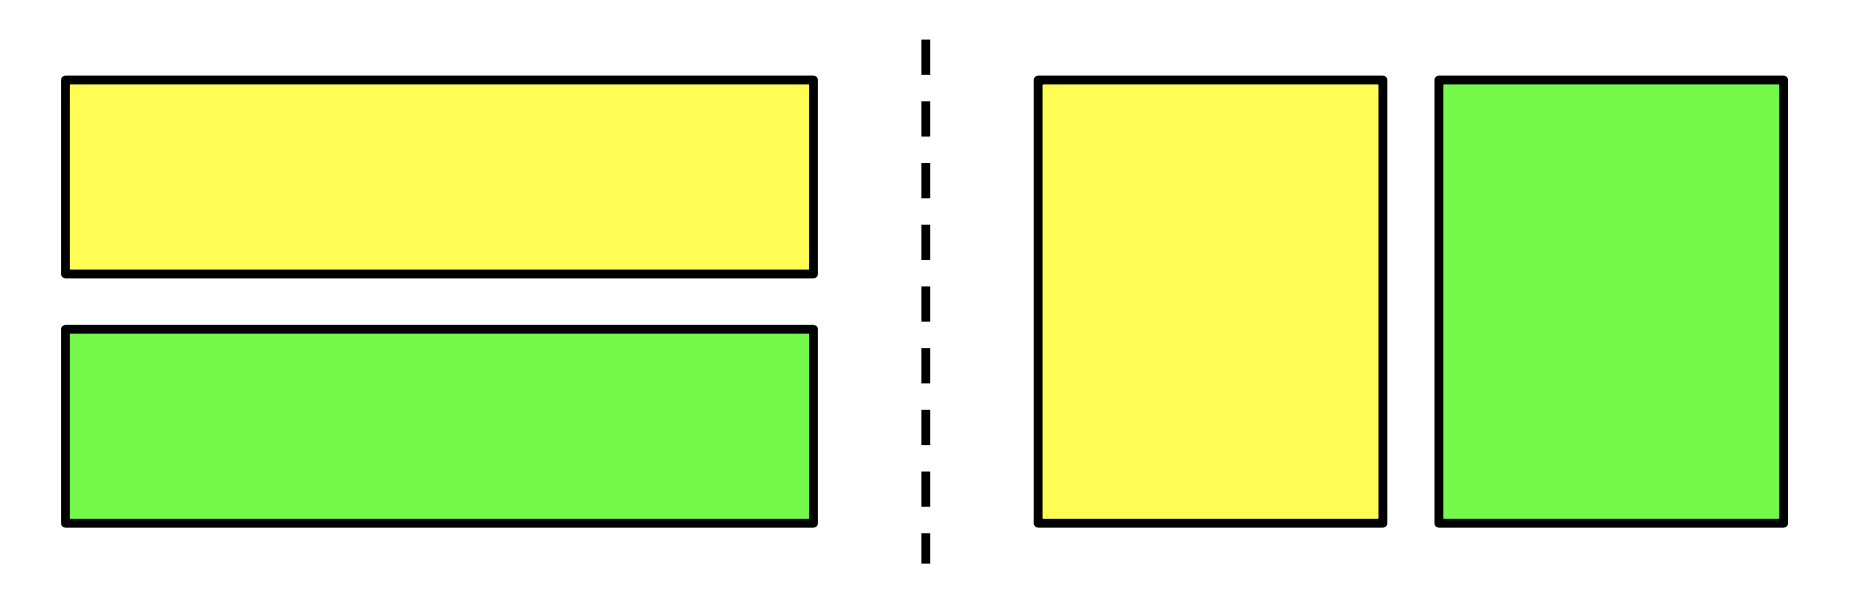

### 1) 상하 결합

In [ ]:
import pandas as pd

df1 = pd.DataFrame({'A' : [1, 2, 3], 'B' : [11, 12, 13], 'C' : [21, 22, 23]})
df2 = pd.DataFrame({'A' : [4, 5, 6], 'B' : [14, 15, 16], 'C' : [24, 25, 26]})

In [ ]:
pd.concat([df1, df2])

,A,B,C
0,1,11,21
1,2,12,22
2,3,13,23
0,4,14,24
1,5,15,25
2,6,16,26


In [ ]:
pd.concat([df2, df1])

,A,B,C
0,4,14,24
1,5,15,25
2,6,16,26
0,1,11,21
1,2,12,22
2,3,13,23


\- index 초기화를 위해서는 ignore_index = True

In [ ]:
pd.concat([df1, df2], ignore_index = True)

,A,B,C
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24
4,5,15,25
5,6,16,26


\- 필드의 순서가 섞였을 때 결합 결과 확인

In [ ]:
df1 = pd.DataFrame({'A' : [1, 2, 3], 'B' : [11, 12, 13], 'C' : [21, 22, 23]})
df2 = pd.DataFrame({'B' : [14, 15, 16], 'A' : [4, 5, 6], 'C' : [24, 25, 26]})

In [ ]:
df1

,A,B,C
0,1,11,21
1,2,12,22
2,3,13,23


In [ ]:
df2

,B,A,C
0,14,4,24
1,15,5,25
2,16,6,26


In [ ]:
pd.concat([df1, df2])

,A,B,C
0,1,11,21
1,2,12,22
2,3,13,23
0,4,14,24
1,5,15,25
2,6,16,26


\- 서로 다른 필드로 구성되어 있는 데이터 프레임의 결합

In [ ]:
df1 = pd.DataFrame({'A' : [1, 2, 3], 'B' : [11, 12, 13], 'C' : [21, 22, 23], 'D' : [31, 32, 33]})
df2 = pd.DataFrame({'A' : [3, 4, 5], 'B' : [13, 14, 15], 'C' : [23, 24, 25], 'E' : [41, 42, 43]})

In [ ]:
df1

,A,B,C,D
0,1,11,21,31
1,2,12,22,32
2,3,13,23,33


In [ ]:
df2

,A,B,C,E
0,3,13,23,41
1,4,14,24,42
2,5,15,25,43


In [ ]:
pd.concat([df1, df2])

,A,B,C,D,E
0,1,11,21,31.0,NaN
1,2,12,22,32.0,NaN
2,3,13,23,33.0,NaN
0,3,13,23,NaN,41.0
1,4,14,24,NaN,42.0
2,5,15,25,NaN,43.0


In [ ]:
pd.concat([df1, df2], join = 'outer')

,A,B,C,D,E
0,1,11,21,31.0,NaN
1,2,12,22,32.0,NaN
2,3,13,23,33.0,NaN
0,3,13,23,NaN,41.0
1,4,14,24,NaN,42.0
2,5,15,25,NaN,43.0


In [ ]:
pd.concat([df1, df2], join = 'inner')

,A,B,C
0,1,11,21
1,2,12,22
2,3,13,23
0,3,13,23
1,4,14,24
2,5,15,25


### 2) 좌우 결합

In [ ]:
import pandas as pd

df1 = pd.DataFrame({'A' : [1, 2, 3], 'B' : [11, 12, 13], 'C' : [21, 22, 23], 'D' : [31, 32, 33]})
df2 = pd.DataFrame({'E' : [3, 4, 5], 'F' : [13, 14, 15], 'G' : [23, 24, 25], 'H' : [41, 42, 43]})

In [ ]:
df1

,A,B,C,D
0,1,11,21,31
1,2,12,22,32
2,3,13,23,33


In [ ]:
df2

,E,F,G,H
0,3,13,23,41
1,4,14,24,42
2,5,15,25,43


In [ ]:
pd.concat([df1, df2], axis = 1)

,A,B,C,D,E,F,G,H
0,1,11,21,31,3,13,23,41
1,2,12,22,32,4,14,24,42
2,3,13,23,33,5,15,25,43


\- 다음 두 데이터 프레임을 결합하시오.

In [ ]:
df1 = pd.DataFrame({'ID' : [1, 2, 3], '성별' : ['F', 'M', 'F'], '나이' : [20, 30, 40]})
df2 = pd.DataFrame({'ID' : [1, 2, 3], '키' : [160.5, 170.3, 180.1], '몸무게' : [45.1, 50.3, 72.1]})

In [ ]:
df1

,ID,성별,나이
0,1,F,20
1,2,M,30
2,3,F,40


In [ ]:
df2

,ID,키,몸무게
0,1,160.5,45.1
1,2,170.3,50.3
2,3,180.1,72.1


In [ ]:
pd.concat([df1, df2], axis = 1)

,ID,성별,나이,ID,키,몸무게
0,1,F,20,1,160.5,45.1
1,2,M,30,2,170.3,50.3
2,3,F,40,3,180.1,72.1


\- 다음 두 데이터 프레임을 ID를 기준으로 결합하시오.

In [ ]:
df1 = pd.DataFrame({'ID' : [1, 2, 3, 4, 5], '성별' : ['F', 'M', 'F', 'M', 'F'], '나이' : [20, 30, 40, 25, 42]})
df2 = pd.DataFrame({'ID' : [3, 4, 5, 6, 7], '키' : [160.5, 170.3, 180.1, 142.3, 153.7], '몸무게' : [45.1, 50.3, 72.1, 38,  42]})

In [ ]:
df1

,ID,성별,나이
0,1,F,20
1,2,M,30
2,3,F,40
3,4,M,25
4,5,F,42


In [ ]:
df2

,ID,키,몸무게
0,3,160.5,45.1
1,4,170.3,50.3
2,5,180.1,72.1
3,6,142.3,38.0
4,7,153.7,42.0


In [ ]:
pd.concat([df1, df2], axis = 1)

,ID,성별,나이,ID,키,몸무게
0,1,F,20,3,160.5,45.1
1,2,M,30,4,170.3,50.3
2,3,F,40,5,180.1,72.1
3,4,M,25,6,142.3,38.0
4,5,F,42,7,153.7,42.0


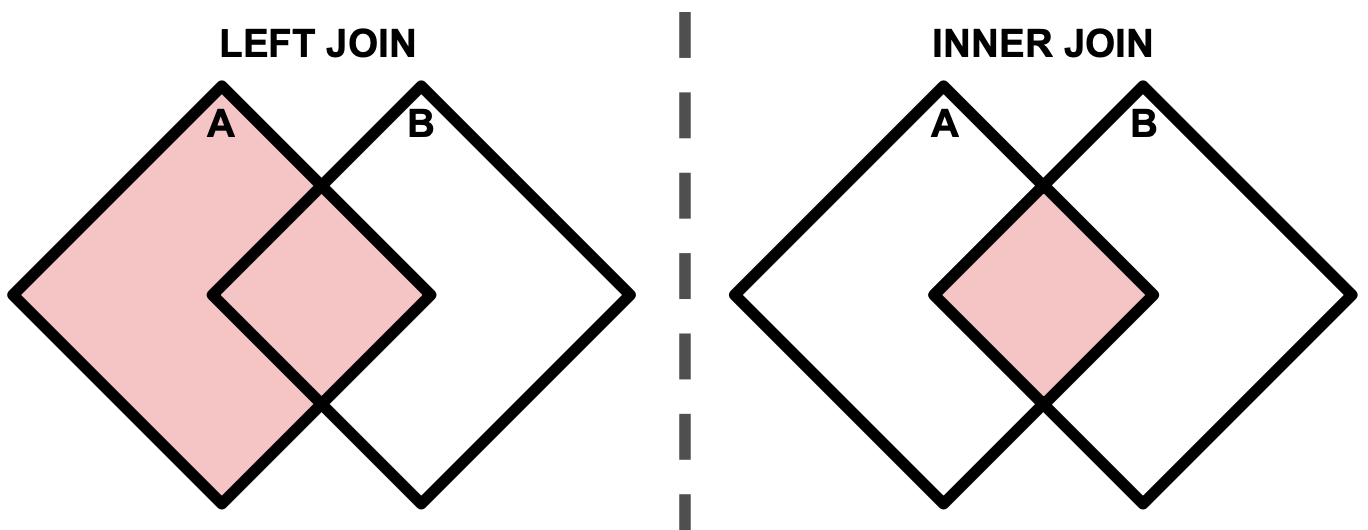

In [ ]:
df1 = pd.DataFrame({'ID' : [1, 2, 3, 4, 5], '성별' : ['F', 'M', 'F', 'M', 'F'], '나이' : [20, 30, 40, 25, 42]})
df2 = pd.DataFrame({'ID' : [3, 4, 5, 6, 7], '키' : [160.5, 170.3, 180.1, 142.3, 153.7], '몸무게' : [45.1, 50.3, 72.1, 38,  42]})

In [ ]:
df1

,ID,성별,나이
0,1,F,20
1,2,M,30
2,3,F,40
3,4,M,25
4,5,F,42


In [ ]:
df2

,ID,키,몸무게
0,3,160.5,45.1
1,4,170.3,50.3
2,5,180.1,72.1
3,6,142.3,38.0
4,7,153.7,42.0


\- 문제 : 성별과 나이가 확인 된 유저들을 대상으로 키와 몸무게의 정보를 결합하시오.

In [ ]:
pd.merge(df1, df2, how = 'left', on = 'ID') # 'ID'를 키값으로 left join

,ID,성별,나이,키,몸무게
0,1,F,20,NaN,NaN
1,2,M,30,NaN,NaN
2,3,F,40,160.5,45.1
3,4,M,25,170.3,50.3
4,5,F,42,180.1,72.1


\- 문제 : 키와 몸무게가 확인 된 유저들을 대상으로 성별과 나이의 정보를 결합하시오.

In [ ]:
pd.merge(df2, df1, how = 'left', on = 'ID')

,ID,키,몸무게,성별,나이
0,3,160.5,45.1,F,40.0
1,4,170.3,50.3,M,25.0
2,5,180.1,72.1,F,42.0
3,6,142.3,38.0,NaN,NaN
4,7,153.7,42.0,NaN,NaN


또는

In [ ]:
pd.merge(df1, df2, how = 'right', on = 'ID')

,ID,성별,나이,키,몸무게
0,3,F,40.0,160.5,45.1
1,4,M,25.0,170.3,50.3
2,5,F,42.0,180.1,72.1
3,6,NaN,NaN,142.3,38.0
4,7,NaN,NaN,153.7,42.0


\- 문제 : 키, 몸무게, 성별, 나이 정보가 모두 확인 된 유저들의 정보를 출력하시오.

In [ ]:
pd.merge(df1, df2, how = 'inner', on = 'ID')

,ID,성별,나이,키,몸무게
0,3,F,40,160.5,45.1
1,4,M,25,170.3,50.3
2,5,F,42,180.1,72.1


\- 문제 : 모든 유저들의 정보를 출력하시오.

In [ ]:
pd.merge(df1, df2, how = 'outer', on = 'ID')

,ID,성별,나이,키,몸무게
0,1,F,20.0,NaN,NaN
1,2,M,30.0,NaN,NaN
2,3,F,40.0,160.5,45.1
3,4,M,25.0,170.3,50.3
4,5,F,42.0,180.1,72.1
5,6,NaN,NaN,142.3,38.0
6,7,NaN,NaN,153.7,42.0


\- 문제 : 모든 유저들의 정보를 출력하시오.

In [ ]:
df1 = pd.DataFrame({'USER_ID' : [1, 2, 3, 4, 5], '성별' : ['F', 'M', 'F', 'M', 'F'], '나이' : [20, 30, 40, 25, 42]})
df2 = pd.DataFrame({'ID' : [3, 4, 5, 6, 7], '키' : [160.5, 170.3, 180.1, 142.3, 153.7], '몸무게' : [45.1, 50.3, 72.1, 38,  42]})

In [ ]:
pd.merge(df1, df2, how = 'outer', left_on = 'USER_ID', right_on = 'ID')

,USER_ID,성별,나이,ID,키,몸무게
0,1.0,F,20.0,NaN,NaN,NaN
1,2.0,M,30.0,NaN,NaN,NaN
2,3.0,F,40.0,3.0,160.5,45.1
3,4.0,M,25.0,4.0,170.3,50.3
4,5.0,F,42.0,5.0,180.1,72.1
5,NaN,NaN,NaN,6.0,142.3,38.0
6,NaN,NaN,NaN,7.0,153.7,42.0


\- 문제 : df1 은 회원의 정보를 저장한 데이터 프레임이며, df2 는 각 회원의 구매 내역을 저장한 데이터 프레임이다. 각 회원의 정보와 구매 내역을 취합하여 하나의 데이터 프레임으로 만드시오.

In [ ]:
df1 = pd.DataFrame({'ID' : [1, 2, 3, 4, 5], '가입일' : ['2021-01-02', '2021-01-04', '2021-01-10', '2021-02-10', '2021-02-24'], '성별' : ['F', 'M', 'F', 'M', 'M']})
df2 = pd.DataFrame({'구매순서' : [1, 2, 3, 4, 5], 'ID' : [1, 1, 2, 4, 1], '구매월' : [1, 1, 2, 2, 3], '금액' : [1000, 1500, 2000, 3000, 4000]})

In [ ]:
df1

,ID,가입일,성별
0,1,2021-01-02,F
1,2,2021-01-04,M
2,3,2021-01-10,F
3,4,2021-02-10,M
4,5,2021-02-24,M


In [ ]:
df2

,구매순서,ID,구매월,금액
0,1,1,1,1000
1,2,1,1,1500
2,3,2,2,2000
3,4,4,2,3000
4,5,1,3,4000


In [ ]:
pd.merge(df1, df2, how = 'left', on = 'ID')

,ID,가입일,성별,구매순서,구매월,금액
0,1,2021-01-02,F,1.0,1.0,1000.0
1,1,2021-01-02,F,2.0,1.0,1500.0
2,1,2021-01-02,F,5.0,3.0,4000.0
3,2,2021-01-04,M,3.0,2.0,2000.0
4,3,2021-01-10,F,NaN,NaN,NaN
5,4,2021-02-10,M,4.0,2.0,3000.0
6,5,2021-02-24,M,NaN,NaN,NaN


## **그룹화**

In [157]:
import pandas as pd

df1 = pd.DataFrame({'ID' : [1, 2, 3, 4, 5], '가입일' : ['2021-01-02', '2021-01-04', '2021-01-10', '2021-02-10', '2021-02-24'], '성별' : ['F', 'M', 'F', 'M', 'M']})
df2 = pd.DataFrame({'구매순서' : [1, 2, 3, 4, 5], 'ID' : [1, 1, 2, 4, 1], '구매월' : [1, 1, 2, 2, 3], '금액' : [1000, 1500, 2000, 3000, 4000]})

\- 문제 : df1 은 회원의 정보를 저장한 데이터 프레임이며, df2 는 각 회원의 구매 내역을 저장한 데이터 프레임이다. 각 회원의 정보와 구매 내역을 취합하여 하나의 데이터 프레임으로 만드시오.

In [158]:
pd.merge(df1, df2, how = 'left', on = 'ID')

,ID,가입일,성별,구매순서,구매월,금액
0,1,2021-01-02,F,1.0,1.0,1000.0
1,1,2021-01-02,F,2.0,1.0,1500.0
2,1,2021-01-02,F,5.0,3.0,4000.0
3,2,2021-01-04,M,3.0,2.0,2000.0
4,3,2021-01-10,F,NaN,NaN,NaN
5,4,2021-02-10,M,4.0,2.0,3000.0
6,5,2021-02-24,M,NaN,NaN,NaN


\- 문제 : df1 은 회원의 정보를 저장한 데이터 프레임이며, df2 는 각 회원의 구매 내역을 저장한 데이터 프레임이다. 각 회원의 누적 금액을 회원 ID 별로 구하시오.

In [159]:
df2

,구매순서,ID,구매월,금액
0,1,1,1,1000
1,2,1,1,1500
2,3,2,2,2000
3,4,4,2,3000
4,5,1,3,4000


In [165]:
df2.groupby(by = ['ID'])['금액'].sum()

ID
1    6500
2    2000
4    3000
Name: 금액, dtype: int64

In [166]:
type(df2.groupby(by = ['ID'])['금액'].sum())

pandas.core.series.Series

In [167]:
s2 = df2.groupby(by = ['ID'])['금액'].sum()

In [168]:
pd.merge(df1, s2, how = 'left', on = 'ID')

,ID,가입일,성별,금액
0,1,2021-01-02,F,6500.0
1,2,2021-01-04,M,2000.0
2,3,2021-01-10,F,NaN
3,4,2021-02-10,M,3000.0
4,5,2021-02-24,M,NaN


\- 문제 : df1 은 회원의 정보를 저장한 데이터 프레임이며, df2 는 각 회원의 구매 내역을 저장한 데이터 프레임이다. 각 회원의 월별 누적 금액을 회원 ID 별로 구하시오.

In [ ]:
df2

,구매순서,ID,구매월,금액
0,1,1,1,1000
1,2,1,1,1500
2,3,2,2,2000
3,4,4,2,3000
4,5,1,3,4000


In [ ]:
df2.groupby(by = ['ID', '구매월'])['금액'].sum()

ID  구매월
1   1      2500
    3      4000
2   2      2000
4   2      3000
Name: 금액, dtype: int64

In [ ]:
type(df2.groupby(by = ['ID', '구매월'])['금액'].sum())

pandas.core.series.Series

In [ ]:
s2 = df2.groupby(by = ['ID', '구매월'])['금액'].sum()

In [ ]:
s2.index

MultiIndex([(1, 1),
            (1, 3),
            (2, 2),
            (4, 2)],
           names=['ID', '구매월'])

In [ ]:
pd.merge(df1, s2, how = 'left', on = 'ID')

,ID,가입일,성별,금액
0,1,2021-01-02,F,2500.0
1,1,2021-01-02,F,4000.0
2,2,2021-01-04,M,2000.0
3,3,2021-01-10,F,NaN
4,4,2021-02-10,M,3000.0
5,5,2021-02-24,M,NaN


In [ ]:
df3 = pd.DataFrame(s2)

In [ ]:
df3

금액
ID 구매월      
1  1    2500
   3    4000
2  2    2000
4  2    3000

In [ ]:
df3.index

MultiIndex([(1, 1),
            (1, 3),
            (2, 2),
            (4, 2)],
           names=['ID', '구매월'])

In [ ]:
pd.merge(df1, df3, how = 'left', on = 'ID')

,ID,가입일,성별,금액
0,1,2021-01-02,F,2500.0
1,1,2021-01-02,F,4000.0
2,2,2021-01-04,M,2000.0
3,3,2021-01-10,F,NaN
4,4,2021-02-10,M,3000.0
5,5,2021-02-24,M,NaN


\- 그룹을 index 로 사용하고 싶지 않은 경우에는 as_index = False 로 설정

In [ ]:
df2.groupby(by = ['ID', '구매월'], as_index = False)['금액'].sum()

,ID,구매월,금액
0,1,1,2500
1,1,3,4000
2,2,2,2000
3,4,2,3000


In [ ]:
type(df2.groupby(by = ['ID', '구매월'], as_index = False)['금액'].sum())

pandas.core.frame.DataFrame

In [ ]:
df3 = df2.groupby(by = ['ID', '구매월'], as_index = False)['금액'].sum()

In [ ]:
pd.merge(df1, df3, how = 'left', on = 'ID')

,ID,가입일,성별,구매월,금액
0,1,2021-01-02,F,1.0,2500.0
1,1,2021-01-02,F,3.0,4000.0
2,2,2021-01-04,M,2.0,2000.0
3,3,2021-01-10,F,NaN,NaN
4,4,2021-02-10,M,2.0,3000.0
5,5,2021-02-24,M,NaN,NaN


\- 문제 : df 는 각 회원의 구매 내역을 저장한 데이터 프레임이다. 각 회원의 누적 금액과 누적 구매 횟수를 회원 ID 별로 구하시오.

In [ ]:
df = pd.DataFrame({'구매순서' : [1, 2, 3, 4, 5], 'ID' : [1, 1, 2, 4, 1], '구매월' : [1, 1, 2, 2, 3], '금액' : [1000, 1500, 2000, 3000, 4000], '수수료' : [100, 150, 200, 300, 400]})

In [ ]:
df

,구매순서,ID,구매월,금액,수수료
0,1,1,1,1000,100
1,2,1,1,1500,150
2,3,2,2,2000,200
3,4,4,2,3000,300
4,5,1,3,4000,400


In [ ]:
df.groupby(by = ['ID'])['금액'].agg([sum, len])

,sum,len
ID,,
1,6500,3
2,2000,1
4,3000,1


In [ ]:
df.groupby(by = ['ID'], as_index = False)['금액'].agg([sum, len]) # agg 사용하면 as_index = False가 안먹힘

,sum,len
ID,,
1,6500,3
2,2000,1
4,3000,1


In [ ]:
df2 = df.groupby(by = ['ID'])['금액'].agg([sum, len])

In [ ]:
df2.reset_index(inplace = True)

In [ ]:
df2

,ID,sum,len
0,1,6500,3
1,2,2000,1
2,4,3000,1


\- 문제 : df 는 각 회원의 구매 내역을 저장한 데이터 프레임이다. 각 회원의 최대 사용 금액 / 최소 사용 금액과 최저 수수료의 값을 구하시오.

In [ ]:
df

,구매순서,ID,구매월,금액,수수료
0,1,1,1,1000,100
1,2,1,1,1500,150
2,3,2,2,2000,200
3,4,4,2,3000,300
4,5,1,3,4000,400


In [ ]:
df.groupby(by = ['ID']).agg({'금액' : [max, min], '수수료' : min})

금액        수수료
     max   min  min
ID                 
1   4000  1000  100
2   2000  2000  200
4   3000  3000  300

In [ ]:
df2 = df.groupby(by = ['ID']).agg({'금액' : [max, min], '수수료' : min})

In [ ]:
df2.reset_index()

ID    금액        수수료
       max   min  min
0  1  4000  1000  100
1  2  2000  2000  200
2  4  3000  3000  300

In [ ]:
df2.columns

MultiIndex([( '금액', 'max'),
            ( '금액', 'min'),
            ('수수료', 'min')],
           )

In [ ]:
df2.columns.values

array([('금액', 'max'), ('금액', 'min'), ('수수료', 'min')], dtype=object)

In [ ]:
df2.columns = ['_'.join(col) for col in df2.columns.values]

In [ ]:
df2

,금액_max,금액_min,수수료_min
ID,,,
1,4000,1000,100
2,2000,2000,200
4,3000,3000,300


In [ ]:
 df2.reset_index()

,ID,금액_max,금액_min,수수료_min
0,1,4000,1000,100
1,2,2000,2000,200
2,4,3000,3000,300


## **피벗테이블**

In [169]:
import pandas as pd
import numpy as np

\- 문제 : 다음 데이터 프레임은 A 서비스의 월별 탈퇴 회원수를 가입 월별로 분류해 놓은 것이다. 이 데이터 프레임을 이용하여 피벗 테이블을 만드시오.

In [170]:
df = pd.DataFrame({'가입월' : [1, 1, 1, 2, 2, 3], '탈퇴월' : [1, 2, 3, 2, 3, 3], '탈퇴회원수' : [101, 52, 30, 120, 60, 130]})

In [171]:
df

,가입월,탈퇴월,탈퇴회원수
0,1,1,101
1,1,2,52
2,1,3,30
3,2,2,120
4,2,3,60
5,3,3,130


In [ ]:
pivot = pd.pivot_table(df, values = '탈퇴회원수' , index = ['가입월'], columns = ['탈퇴월'])

In [ ]:
type(pivot)

pandas.core.frame.DataFrame

In [ ]:
pivot

탈퇴월,1,2,3
가입월,,,
1,101.0,52.0,30.0
2,NaN,120.0,60.0
3,NaN,NaN,130.0


In [ ]:
pd.pivot_table(df, values = '탈퇴회원수' , index = ['가입월'], columns = ['탈퇴월'], fill_value = 0 )

탈퇴월,1,2,3
가입월,,,
1,101,52,30
2,0,120,60
3,0,0,130


\-  문제 : 다음 데이터 프레임은 어느 과일 매장의 판매내역이다. 각 상품 항목 별, 크기 별로 판매 개수와 판매 금액의 합을 구하시오.

In [ ]:
import random

In [ ]:
random.randint(1,3)

2

In [ ]:
a = []
b = []

for i in range(100):
    a.append(random.randint(1,3))
    b.append(random.randint(1,3))

In [ ]:
df = pd.DataFrame({'품목' : a, '크기' : b})

In [ ]:
df

,품목,크기
0,2,2
1,2,3
2,2,2
3,1,3
4,1,1
...,...,...
95,1,1
96,1,2
97,1,3
98,2,2


In [ ]:
df['금액'] = df['품목'] * df['크기'] * 500
df['수수료'] = df['금액'] * 0.1

In [ ]:
df

,품목,크기,금액,수수료
0,2,2,2000,200.0
1,2,3,3000,300.0
2,2,2,2000,200.0
3,1,3,1500,150.0
4,1,1,500,50.0
...,...,...,...,...
95,1,1,500,50.0
96,1,2,1000,100.0
97,1,3,1500,150.0
98,2,2,2000,200.0


In [ ]:
fruit_name = {1 : '토마토', 2 : '바나나', 3 : '사과'}
fruit_size = {1 : '소', 2 : '중', 3 : '대'}

df['품목'] = df['품목'].map(fruit_name)
df['크기'] = df['크기'].map(fruit_size)

In [ ]:
df

,품목,크기,금액,수수료
0,바나나,중,2000,200.0
1,바나나,대,3000,300.0
2,바나나,중,2000,200.0
3,토마토,대,1500,150.0
4,토마토,소,500,50.0
...,...,...,...,...
95,토마토,소,500,50.0
96,토마토,중,1000,100.0
97,토마토,대,1500,150.0
98,바나나,중,2000,200.0


In [ ]:
pd.pivot_table(df, values = '금액', index = ['품목'], columns = ['크기'], aggfunc = ( 'count', 'sum'))

count            sum              
크기      대   소   중      대      소      중
품목                                    
바나나    10  10  12  30000  10000  24000
사과      9  16  10  40500  24000  30000
토마토    17   7   9  25500   3500   9000

\-  문제 : 다음 데이터 프레임은. 어느 과일 매장의 판매내역이다. 각 상품 항목 별, 크기 별로. 판매 개수와 판매 금액 / 수수료의 합을 구하시오.

In [ ]:
df

,품목,크기,금액,수수료
0,토마토,중,1000,100.0
1,사과,소,1500,150.0
2,바나나,대,3000,300.0
3,사과,소,1500,150.0
4,토마토,대,1500,150.0
...,...,...,...,...
95,토마토,중,1000,100.0
96,사과,소,1500,150.0
97,토마토,중,1000,100.0
98,바나나,대,3000,300.0


In [ ]:
pd.pivot_table(df, index = ['품목'], columns = ['크기'], aggfunc = {'금액' : ['count', 'sum'], '수수료' : 'sum'})

금액                                  수수료                
    count            sum                   sum                
크기      대   소   중      대      소      중       대       소       중
품목                                                            
바나나    10  10  12  30000  10000  24000  3000.0  1000.0  2400.0
사과      9  16  10  40500  24000  30000  4050.0  2400.0  3000.0
토마토    17   7   9  25500   3500   9000  2550.0   350.0   900.0

## **파일 호출 / 저장**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

* 파일 호출

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/00__강의자료/2021_05_패스트캠퍼스_데이터분석/실습자료/00_colab/02_데이터_전처리/과일가게.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df

,Unnamed: 0,품목,크기,금액,수수료
0,0,바나나,중,2000,200.0
1,1,바나나,대,3000,300.0
2,2,바나나,중,2000,200.0
3,3,토마토,대,1500,150.0
4,4,토마토,소,500,50.0
...,...,...,...,...,...
95,95,토마토,소,500,50.0
96,96,토마토,중,1000,100.0
97,97,토마토,대,1500,150.0
98,98,바나나,중,2000,200.0


\- head() : 처음부터 5행까지 출력

In [ ]:
df.head(10)

,Unnamed: 0,품목,크기,금액,수수료
0,0,바나나,중,2000,200.0
1,1,바나나,대,3000,300.0
2,2,바나나,중,2000,200.0
3,3,토마토,대,1500,150.0
4,4,토마토,소,500,50.0
5,5,바나나,중,2000,200.0
6,6,바나나,소,1000,100.0
7,7,사과,중,3000,300.0
8,8,바나나,중,2000,200.0
9,9,토마토,소,500,50.0


\- tail : 뒤에서부터 5행까지 출력

In [ ]:
df.tail(10)

,Unnamed: 0,품목,크기,금액,수수료
90,90,토마토,소,500,50.0
91,91,바나나,중,2000,200.0
92,92,사과,중,3000,300.0
93,93,바나나,소,1000,100.0
94,94,토마토,중,1000,100.0
95,95,토마토,소,500,50.0
96,96,토마토,중,1000,100.0
97,97,토마토,대,1500,150.0
98,98,바나나,중,2000,200.0
99,99,바나나,소,1000,100.0


\- 첫 번째 열을 인덱스열로 삼고 싶을 경우

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/00__강의자료/2021_05_패스트캠퍼스_데이터분석/실습자료/00_colab/02_데이터_전처리/과일가게.csv', index_col = 0)

In [ ]:
df.head()

,품목,크기,금액,수수료
0,바나나,중,2000,200.0
1,바나나,대,3000,300.0
2,바나나,중,2000,200.0
3,토마토,대,1500,150.0
4,토마토,소,500,50.0


\- 구분자가 , 가 아닌 다른 기호인 경우

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/00__강의자료/2021_05_패스트캠퍼스_데이터분석/실습자료/00_colab/02_데이터_전처리/read_sep.txt', index_col = 0, sep = '|')

In [ ]:
df

,A,B,C
index,,,
0,1,11,21
1,2,12,22
2,3,13,23


\- header 가 여러줄인 경우

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/00__강의자료/2021_05_패스트캠퍼스_데이터분석/실습자료/00_colab/02_데이터_전처리/read_multi_header.csv', header = 1)

In [ ]:
df

,a,b,c
0,1,11,21
1,2,12,22
2,3,13,23
3,4,14,24


In [ ]:
df.columns

Index(['a', ' b', ' c'], dtype='object')

\- 데이터를 읽으면서 칼럼명을 추가하고 싶을 때

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/00__강의자료/2021_05_패스트캠퍼스_데이터분석/실습자료/00_colab/02_데이터_전처리/make_column_name.csv', 
                 index_col = 0, names = ['품목', '크기', '금액', '수수료'])

In [ ]:
df.head()

,품목,크기,금액,수수료
0,바나나,중,2000,200.0
1,바나나,대,3000,300.0
2,바나나,중,2000,200.0
3,토마토,대,1500,150.0
4,토마토,소,500,50.0


\- 원하는 칼럼만 쓰고 싶을 때

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/00__강의자료/2021_05_패스트캠퍼스_데이터분석/실습자료/00_colab/02_데이터_전처리/과일가게.csv', usecols = ['품목', '크기'])

In [ ]:
df.head()

,품목,크기
0,바나나,중
1,바나나,대
2,바나나,중
3,토마토,대
4,토마토,소


* 파일 저장

In [ ]:
df.head()

,품목,크기
0,바나나,중
1,바나나,대
2,바나나,중
3,토마토,대
4,토마토,소


In [ ]:
df.to_csv('/content/drive/MyDrive/00__강의자료/2021_05_패스트캠퍼스_데이터분석/실습자료/00_colab/02_데이터_전처리/make_csv.csv')